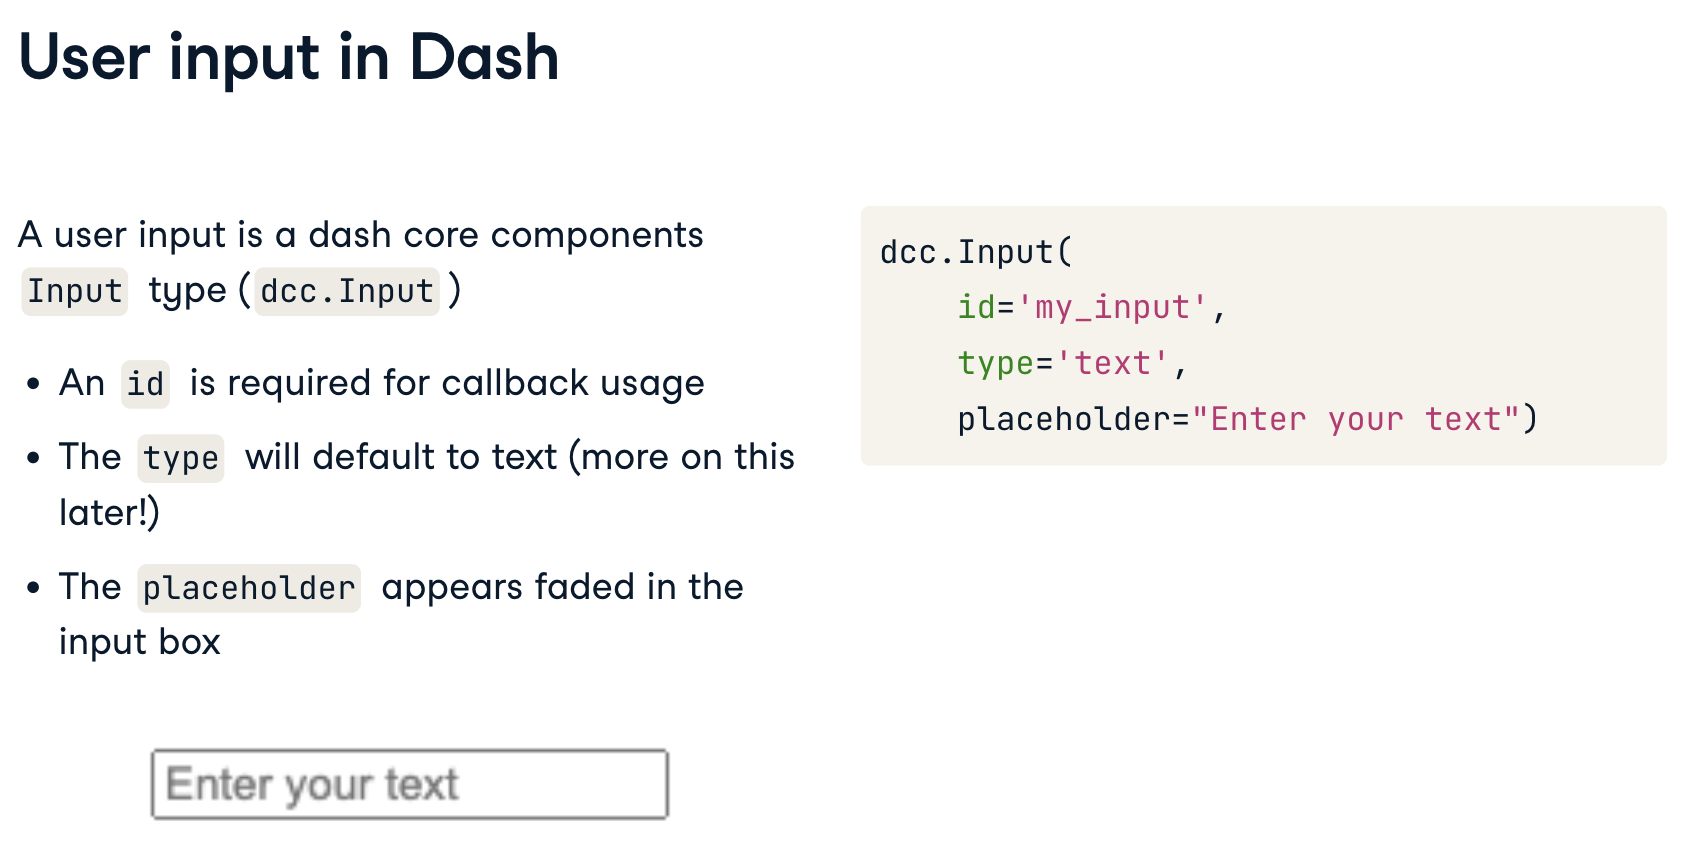

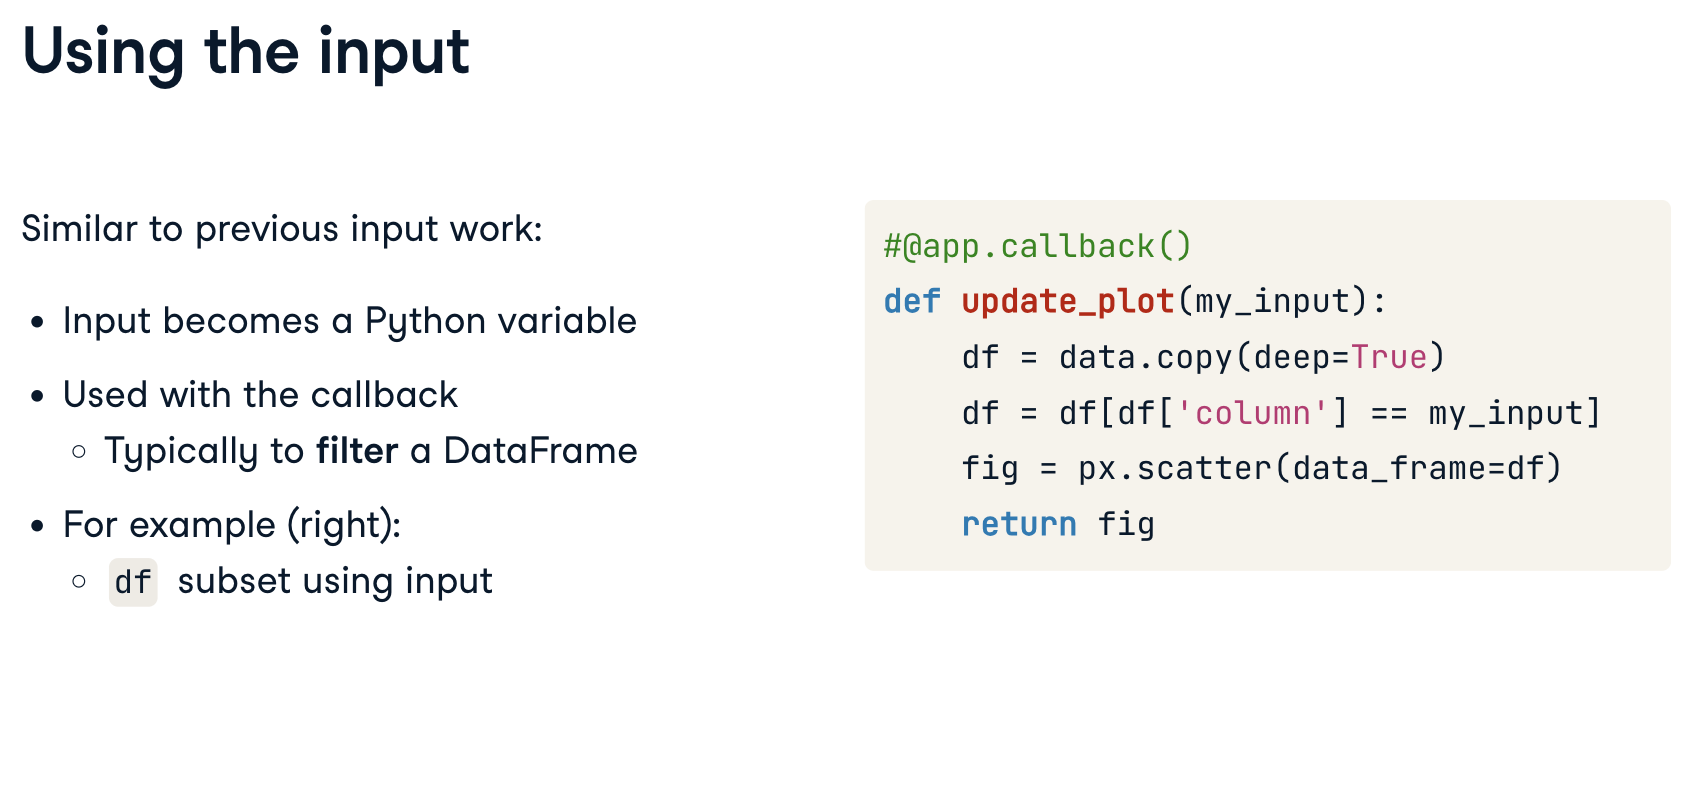

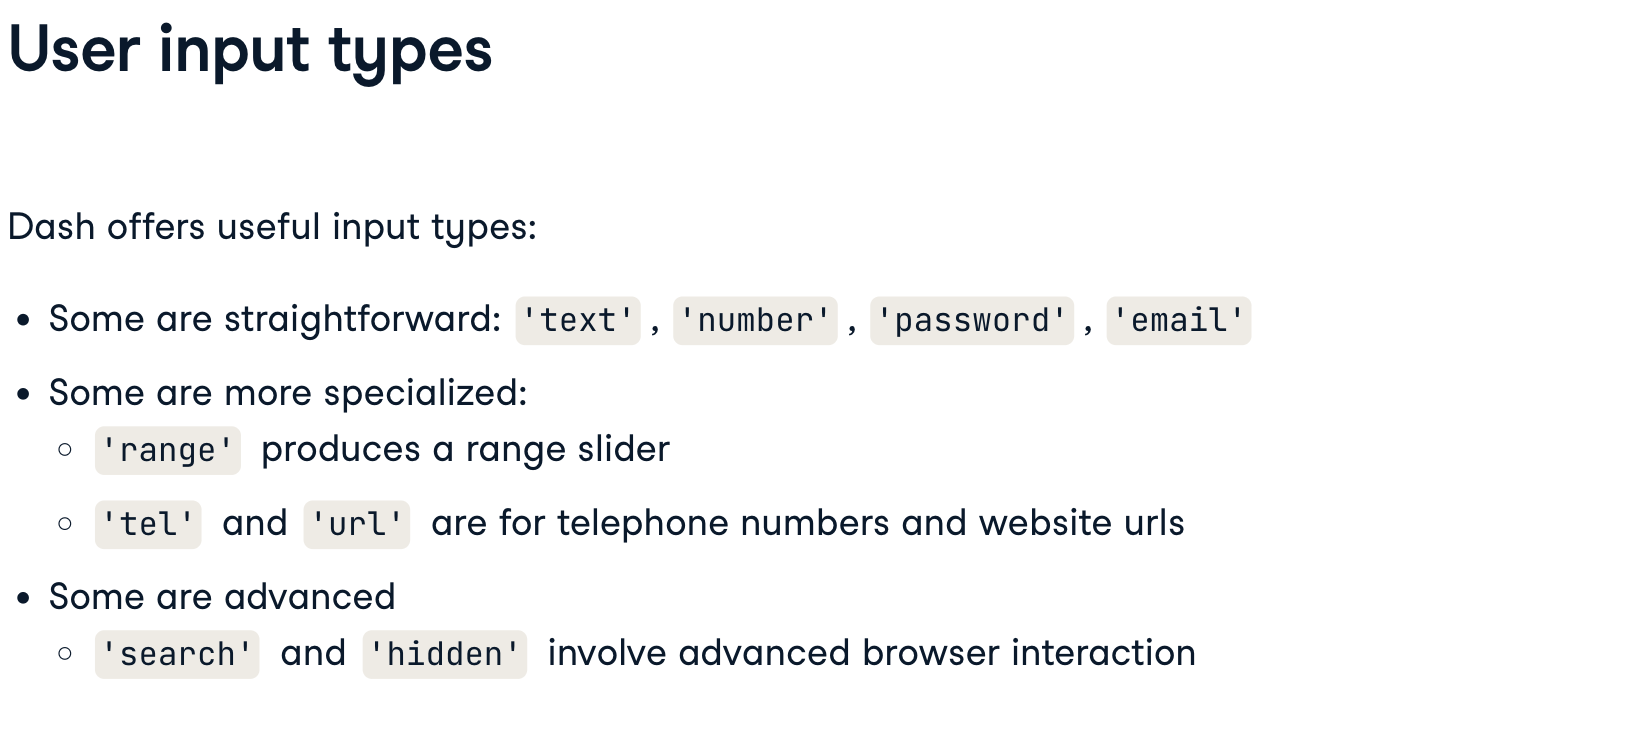

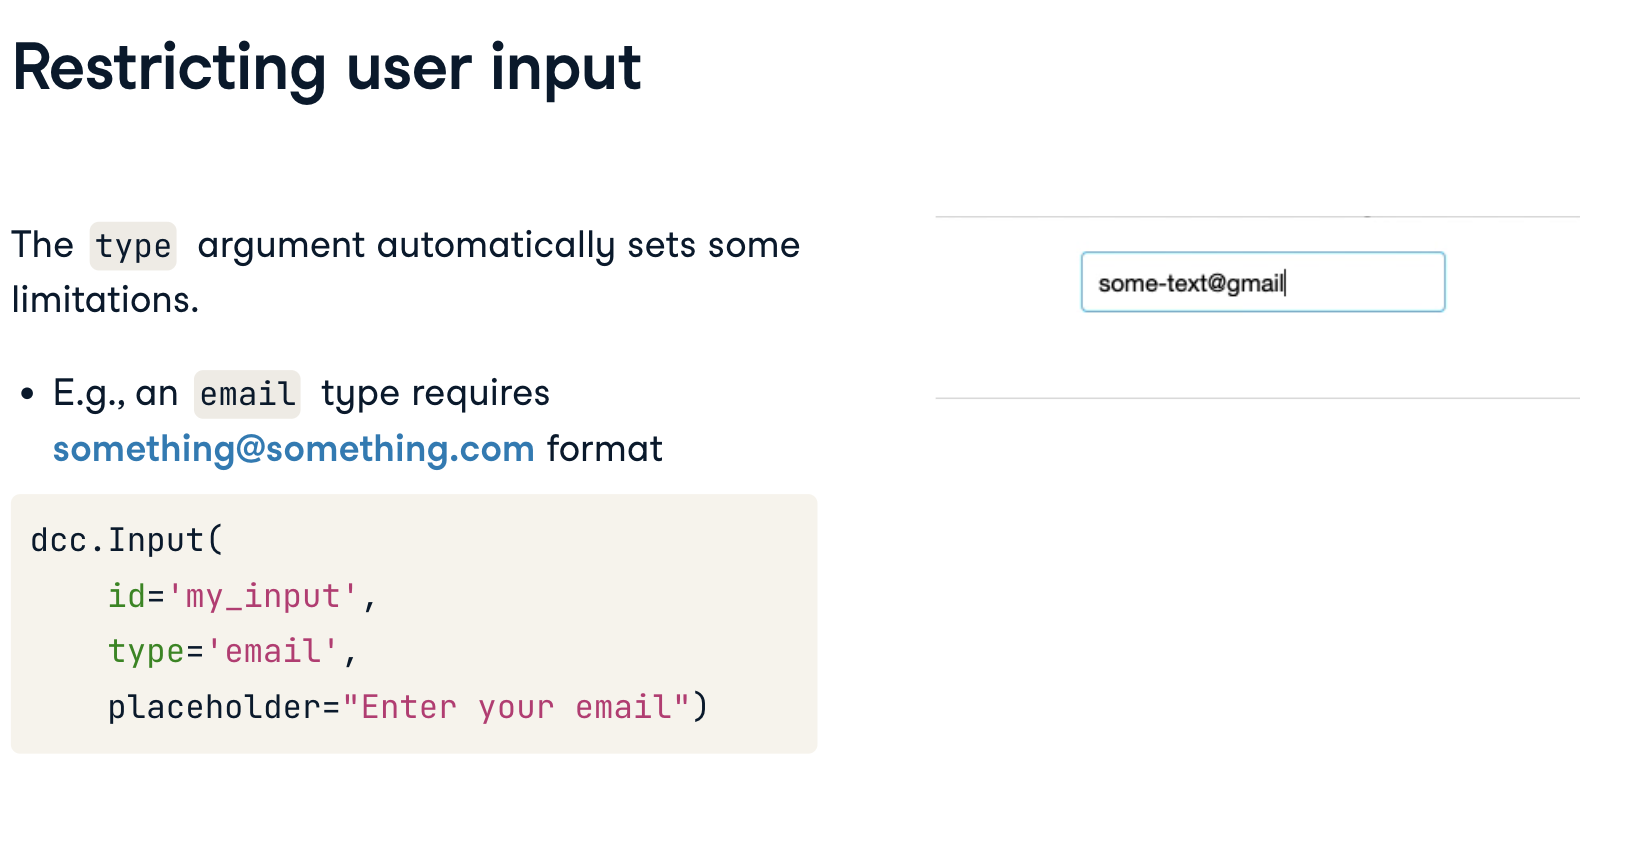

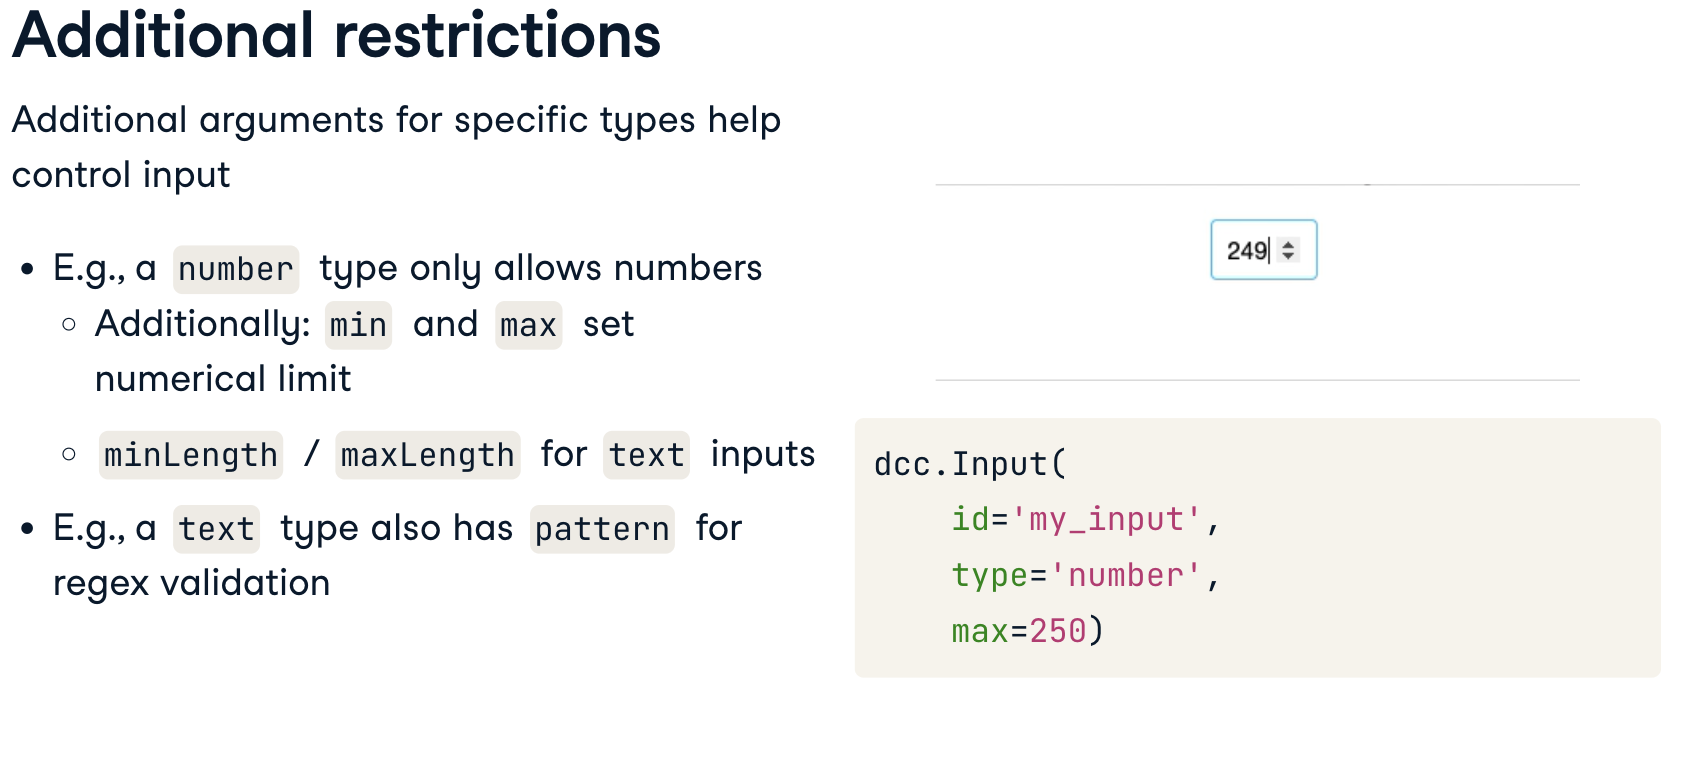

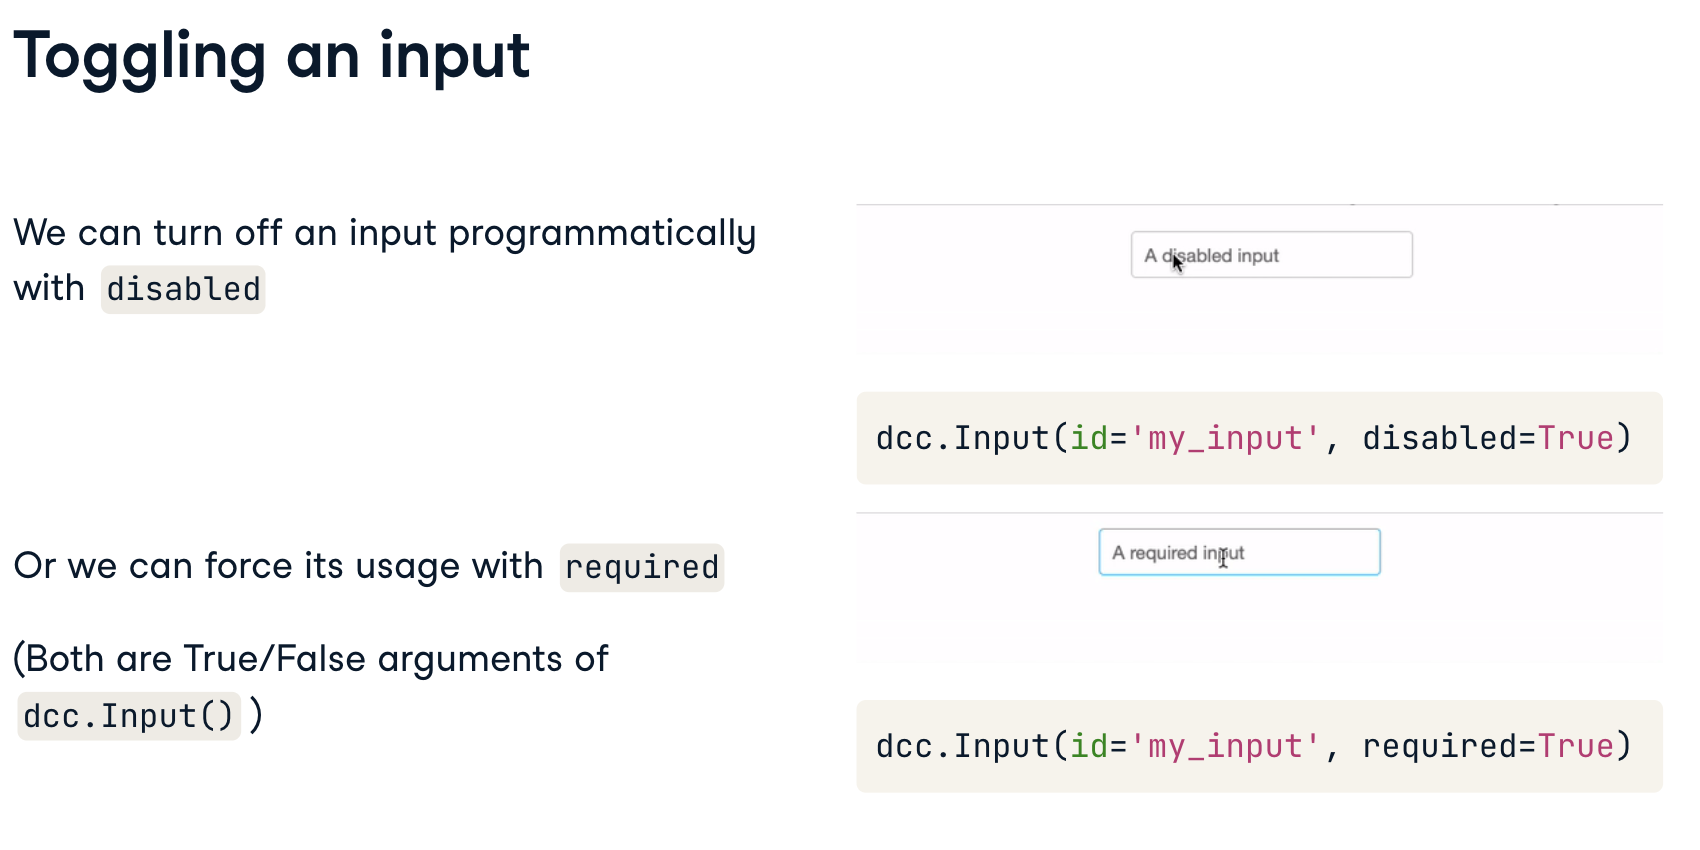

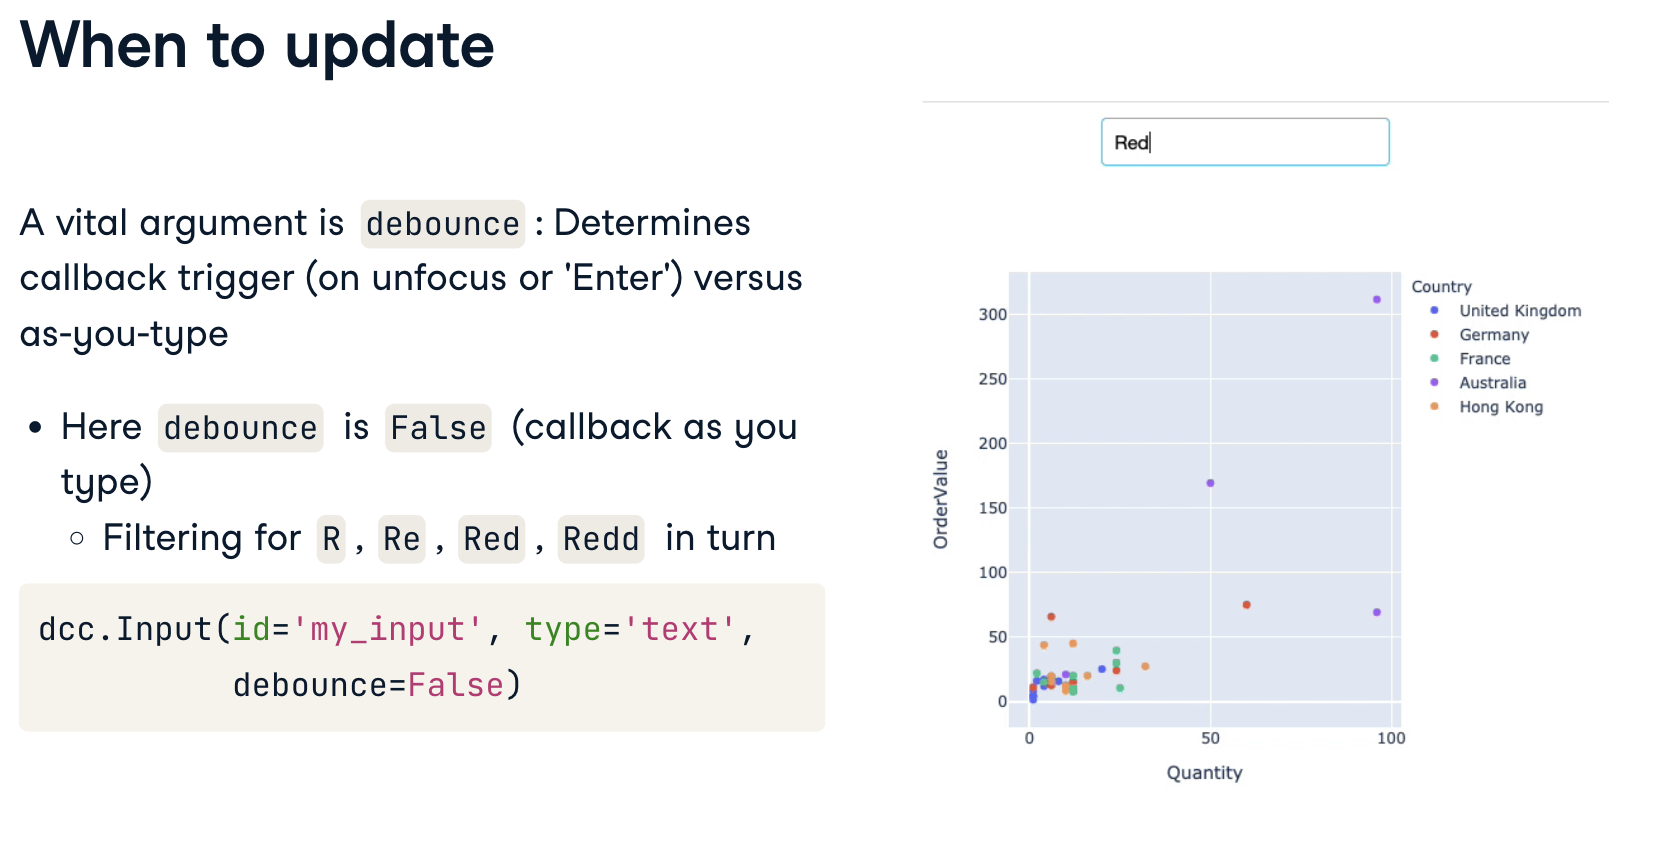

## Exercice 
Searching product descriptions
The e-commerce company you have been working with has a new challenge for you.

They are interested in providing a way to explore their sales data by country but are encountering difficulties with the product Description column. Unfortunately, the product Description column is a text field with many different values, which won't look good in a dropdown. They may wish to explore colors, brands, or other key descriptors easily.

This sounds like a job for a user-input component!

Help the e-commerce company to enhance their Dash app by taking a text user input to filter the Description column of the provided ecom_sales dataset.

In [9]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date

# Create a sample DataFrame
data = {
    'InvoiceDate': ['2023-09-01', '2023-09-01', '2023-09-02', '2023-09-02', '2023-09-03'],
    'Major Category': ['Clothes', 'Kitchen', 'Garden', 'Household', 'Clothes'],
    'Minor Category': ['Shirts', 'Cookware', 'Tools', 'Cleaning', 'Dresses'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000],
}

ecom_sales = pd.DataFrame(data)
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])

logo_link = 'logo.png'

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def add_logo():
    corp_logo = html.Img(
        src=logo_link, 
        style={'margin':'20px 20px 5px 5px',
              'border':'1px dashed lightblue',
              'display':'inline-block'})
    return corp_logo

def style_c():
    layout_style={
        'display':'inline-block',
        'margin':'0 auto',
        'padding':'20px',
    }
    return layout_style
  
app = dash.Dash(__name__)

app.layout = html.Div([
  add_logo(),
  *make_break(2),
  html.H1('Sales Dashboard'),
  *make_break(3),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls', style=style_c()),
        html.H3('Search Descriptions'),
        *make_break(2),
        # Add the required input
        dcc.Input(id='search_desc', type='text', 
        placeholder='Filter Product Descriptions',
        # Ensure input is triggered with 'Enter'
        debounce=True,
        # Ensure the plot can load without a selection
        value='',
        style={'width':'200px', 'height':'30px'})
        ],
        style={'width':'350px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black',
        'display':'inline-block', 'margin':'0px 80px'}),
    html.Div(children=[
            dcc.Graph(id='sales_desc'),
            html.H2('Sales Quantity by Country', 
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ])
    ], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_desc', component_property='figure'),
    Input(component_id='search_desc', component_property='value')
)
def update_plot(search_value):
    title_value = 'None Selected (Showing all)'

    sales = ecom_sales.copy(deep=True)

    # Undertake the filter here using the user input
    if search_value:
        sales = sales[sales['Minor Category'].str.contains(search_value, case=False)]
        title_value = search_value

    fig = px.scatter(data_frame=sales, 
                    y='OrderValue', x='InvoiceDate', color='Major Category', title=f'Sales with description text: {title_value}')

    return fig

if __name__ == '__main__':
    app.run_server(port=60308, debug=True)


## Exercice 2

In [7]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
from datetime import datetime, date

# Create a sample DataFrame
data = {
    'InvoiceDate': ['2023-09-01', '2023-09-01', '2023-09-02', '2023-09-02', '2023-09-03'],
    'Major Category': ['Clothes', 'Kitchen', 'Garden', 'Household', 'Clothes'],
    'Minor Category': ['Shirts', 'Cookware', 'Tools', 'Cleaning', 'Dresses'],
    'OrderValue': [15000, 18000, 22000, 20000, 24000],
}

ecom_sales = pd.DataFrame(data)
ecom_sales['InvoiceDate'] = pd.to_datetime(ecom_sales['InvoiceDate'])

logo_link = 'logo.png'

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list

def add_logo():
    corp_logo = html.Img(
        src=logo_link, 
        style={'margin':'20px 20px 5px 5px',
              'border':'1px dashed lightblue',
              'display':'inline-block'})
    return corp_logo

def style_c():
    layout_style={
        'display':'inline-block',
        'margin':'0 auto',
        'padding':'20px',
    }
    return layout_style

app = dash.Dash(__name__)

app.layout = html.Div([
  add_logo(),
  *make_break(2),
  html.H1('Sales Dashboard'),
  *make_break(3),
  html.Div(
    children=[
    html.Div(
        children=[
        html.H2('Controls', style=style_c()),
        html.H3('Set minimum OrderValue'),
        *make_break(2),
        dcc.Input(
          # Create the specified input
          id='min_order_val', type='range', 
          min=50, max=550, value=50,
          # Ensure the callback is triggered only when the user stops moving the slider
          debounce=False,
        style={'width':'300px', 'height':'30px'})
        ],
        style={'width':'350px', 'height':'350px', 'vertical-align':'top', 'border':'1px solid black',
        'display':'inline-block', 'margin':'0px 80px'}),
    html.Div(children=[
            dcc.Graph(id='sales_country'),
            html.H2('Sales Quantity by Country', 
            style={ 'border':'2px solid black', 'width':'400px', 'margin':'0 auto'})
            ],
             style={'width':'700px','display':'inline-block'}
             ),
    ])
    ], 
  style={'text-align':'center', 'display':'inline-block', 'width':'100%'}
  )

@app.callback(
    Output(component_id='sales_country', component_property='figure'), 
    Input(component_id='min_order_val', component_property='value'))

def update_plot(input_val):
  
    if not input_val:
      input_val = 0
  
    sales = ecom_sales.copy(deep=True)

    # Check for input then use to subset data
    if input_val > 0:
        input_val = round(float(input_val), 2)
        sales = sales[sales['OrderValue'] > input_val]
    
    fig = px.scatter(data_frame=sales, y='OrderValue', height=400,
                     x='Quantity', color='Country',
					 # Set the conditional title
                     title=f'Orders of Min Value ${____}')
    return fig
      
if __name__ == '__main__':
    app.run_server(port=60309, debug=True)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
NameError: name '____' is not defined

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'str' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'str' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: '>' not supported between instances of 'str' and 'int'

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
